In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('delivery_time.csv')

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df["Time"] = np.log2(df["Delivery Time"])

In [5]:
df.head()

,Delivery Time,Sorting Time,Time
0,21.00,10,4.392317
1,13.50,4,3.754888
2,19.75,6,4.303781
3,24.00,9,4.584963
4,29.00,10,4.857981


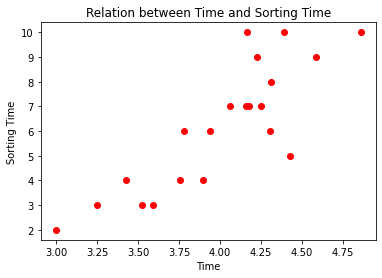

In [6]:
plt.scatter(df["Time"],df["Sorting Time"],color="red")
plt.title("Relation between Time and Sorting Time")
plt.xlabel("Time")
plt.ylabel("Sorting Time")
plt.show()

In [8]:
 X =df["Time"]
 y = df["Sorting Time"]

In [9]:
a = sum((X-np.mean(X))*(y-np.mean(y)))
b = sum((X-np.mean(X))**2)

In [10]:
b1 = a/b
b1

4.668726392264147

In [11]:
b0 = np.mean(y)-b1*np.mean(X)
b0

-12.499232676555259

In [12]:
y_pred = b0+b1*X
y_pred

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
Name: Time, dtype: float64

In [13]:
pd.DataFrame({"Predicted":y_pred,"Actual":y})

,Predicted,Actual
0,8.007296,10
1,5.031310,4
2,7.593942,6
3,8.906703,9
4,10.181351,10
5,5.896328,6
6,7.333179,7
7,2.664452,3
8,6.931482,10
9,7.243965,9


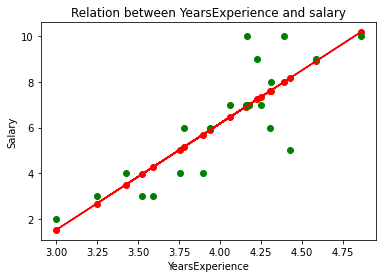

In [14]:
plt.scatter(X,y_pred,color="red")
plt.plot(X,y_pred,color="red")
plt.scatter(X,y,color="green")
plt.title("Relation between YearsExperience and salary")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [15]:
(sum((y-y_pred)**2))/10

3.7356543079497726

In [16]:
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time,Time
0,21.00,10,4.392317
1,13.50,4,3.754888
2,19.75,6,4.303781
3,24.00,9,4.584963
4,29.00,10,4.857981
5,15.35,6,3.940167
6,19.00,7,4.247928
7,9.50,3,3.247928
8,17.90,10,4.161888
9,18.75,9,4.228819


In [17]:
df.corr()

,delivery_time,sorting_time,Time
delivery_time,1.000000,0.825997,0.981502
sorting_time,0.825997,1.000000,0.843177
Time,0.981502,0.843177,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

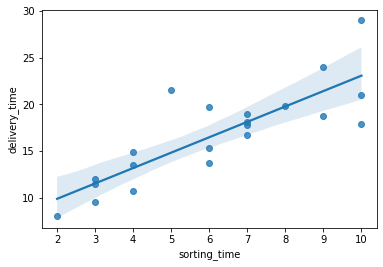

In [18]:
sns.regplot(x=df['sorting_time'],y=df['delivery_time'])

In [19]:
model=smf.ols("delivery_time~sorting_time",data=df).fit()

In [20]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [21]:
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [22]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [23]:
delivery_time = (6.582734) + (1.649020)*(7)
delivery_time

18.125874

In [24]:
new_data=pd.Series([7,10])
new_data

0     7
1    10
dtype: int64

In [25]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,7
1,10


In [26]:
model.predict(data_pred)

0    18.125873
1    23.072933
dtype: float64